In [131]:
import pandas as pd
import pydotplus
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from io import StringIO 
from sklearn.tree import export_graphviz, DecisionTreeClassifier
from IPython.display import Image
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, StackingClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from gmdhpy.gmdh import Regressor as GMDHRegressor



In [132]:
# Визуализация дерева
def get_png_tree(tree_model_param, feature_names_param):
    dot_data = StringIO()
    export_graphviz(tree_model_param, out_file=dot_data, feature_names=feature_names_param,
                    filled=True, rounded=True, special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph.create_png()

In [133]:
data = pd.read_csv('car_data.csv')
data.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [134]:
le = LabelEncoder()
mms = MinMaxScaler()
data['Age'] = mms.fit_transform(data[['Age']])
data['AnnualSalary'] = mms.fit_transform(data[['AnnualSalary']])
data['Gender'] = le.fit_transform(data['Gender'])
data = data.drop(columns=['User ID'])
data.head()

,Gender,Age,AnnualSalary,Purchased
0,1,0.377778,0.036364,0
1,1,0.488889,0.207273,0
2,1,0.688889,0.429091,0
3,1,0.488889,0.672727,1
4,1,0.155556,0.465455,0


In [135]:
# Название колонки целевого признака
TARGET_KEY = 'Purchased'
# Отделили колонку целевого признака (y_train)
X_data, y_data = data.drop(columns=[TARGET_KEY]), data[[TARGET_KEY]]
# Разделили выборку на тренировочную и тестовую
X_test, X_train, y_test, y_train = train_test_split(X_data, y_data)
FEATURE_NAMES = [column for column in X_test.columns]

# 1 метод: случайные деревья

In [136]:
tree = RandomForestClassifier(n_estimators=5, oob_score=True, random_state=10)
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)

/tmp/ipykernel_24147/1529346013.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  tree.fit(X_train, y_train)
/home/pahan/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


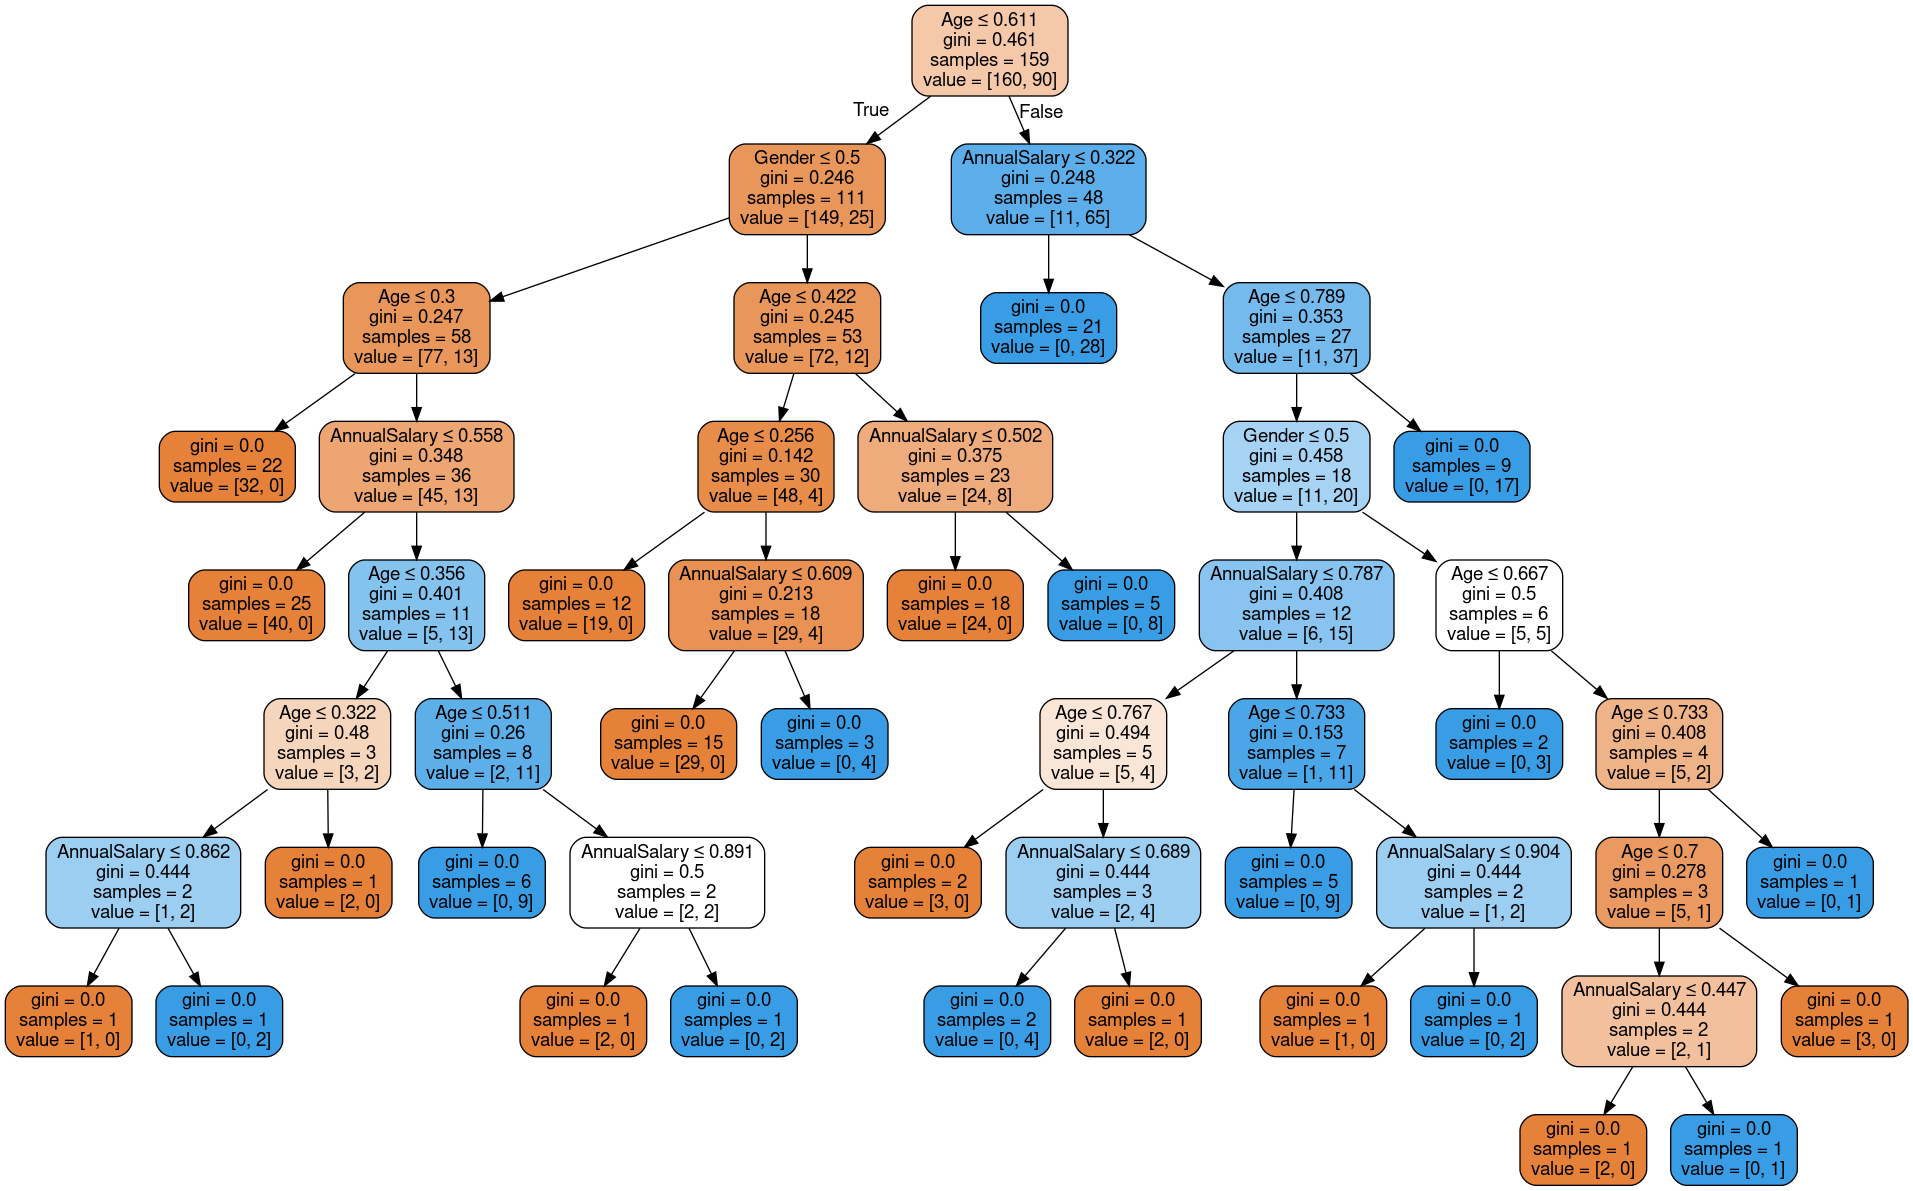

In [137]:
Image(get_png_tree(tree.estimators_[0], FEATURE_NAMES), width="5000")

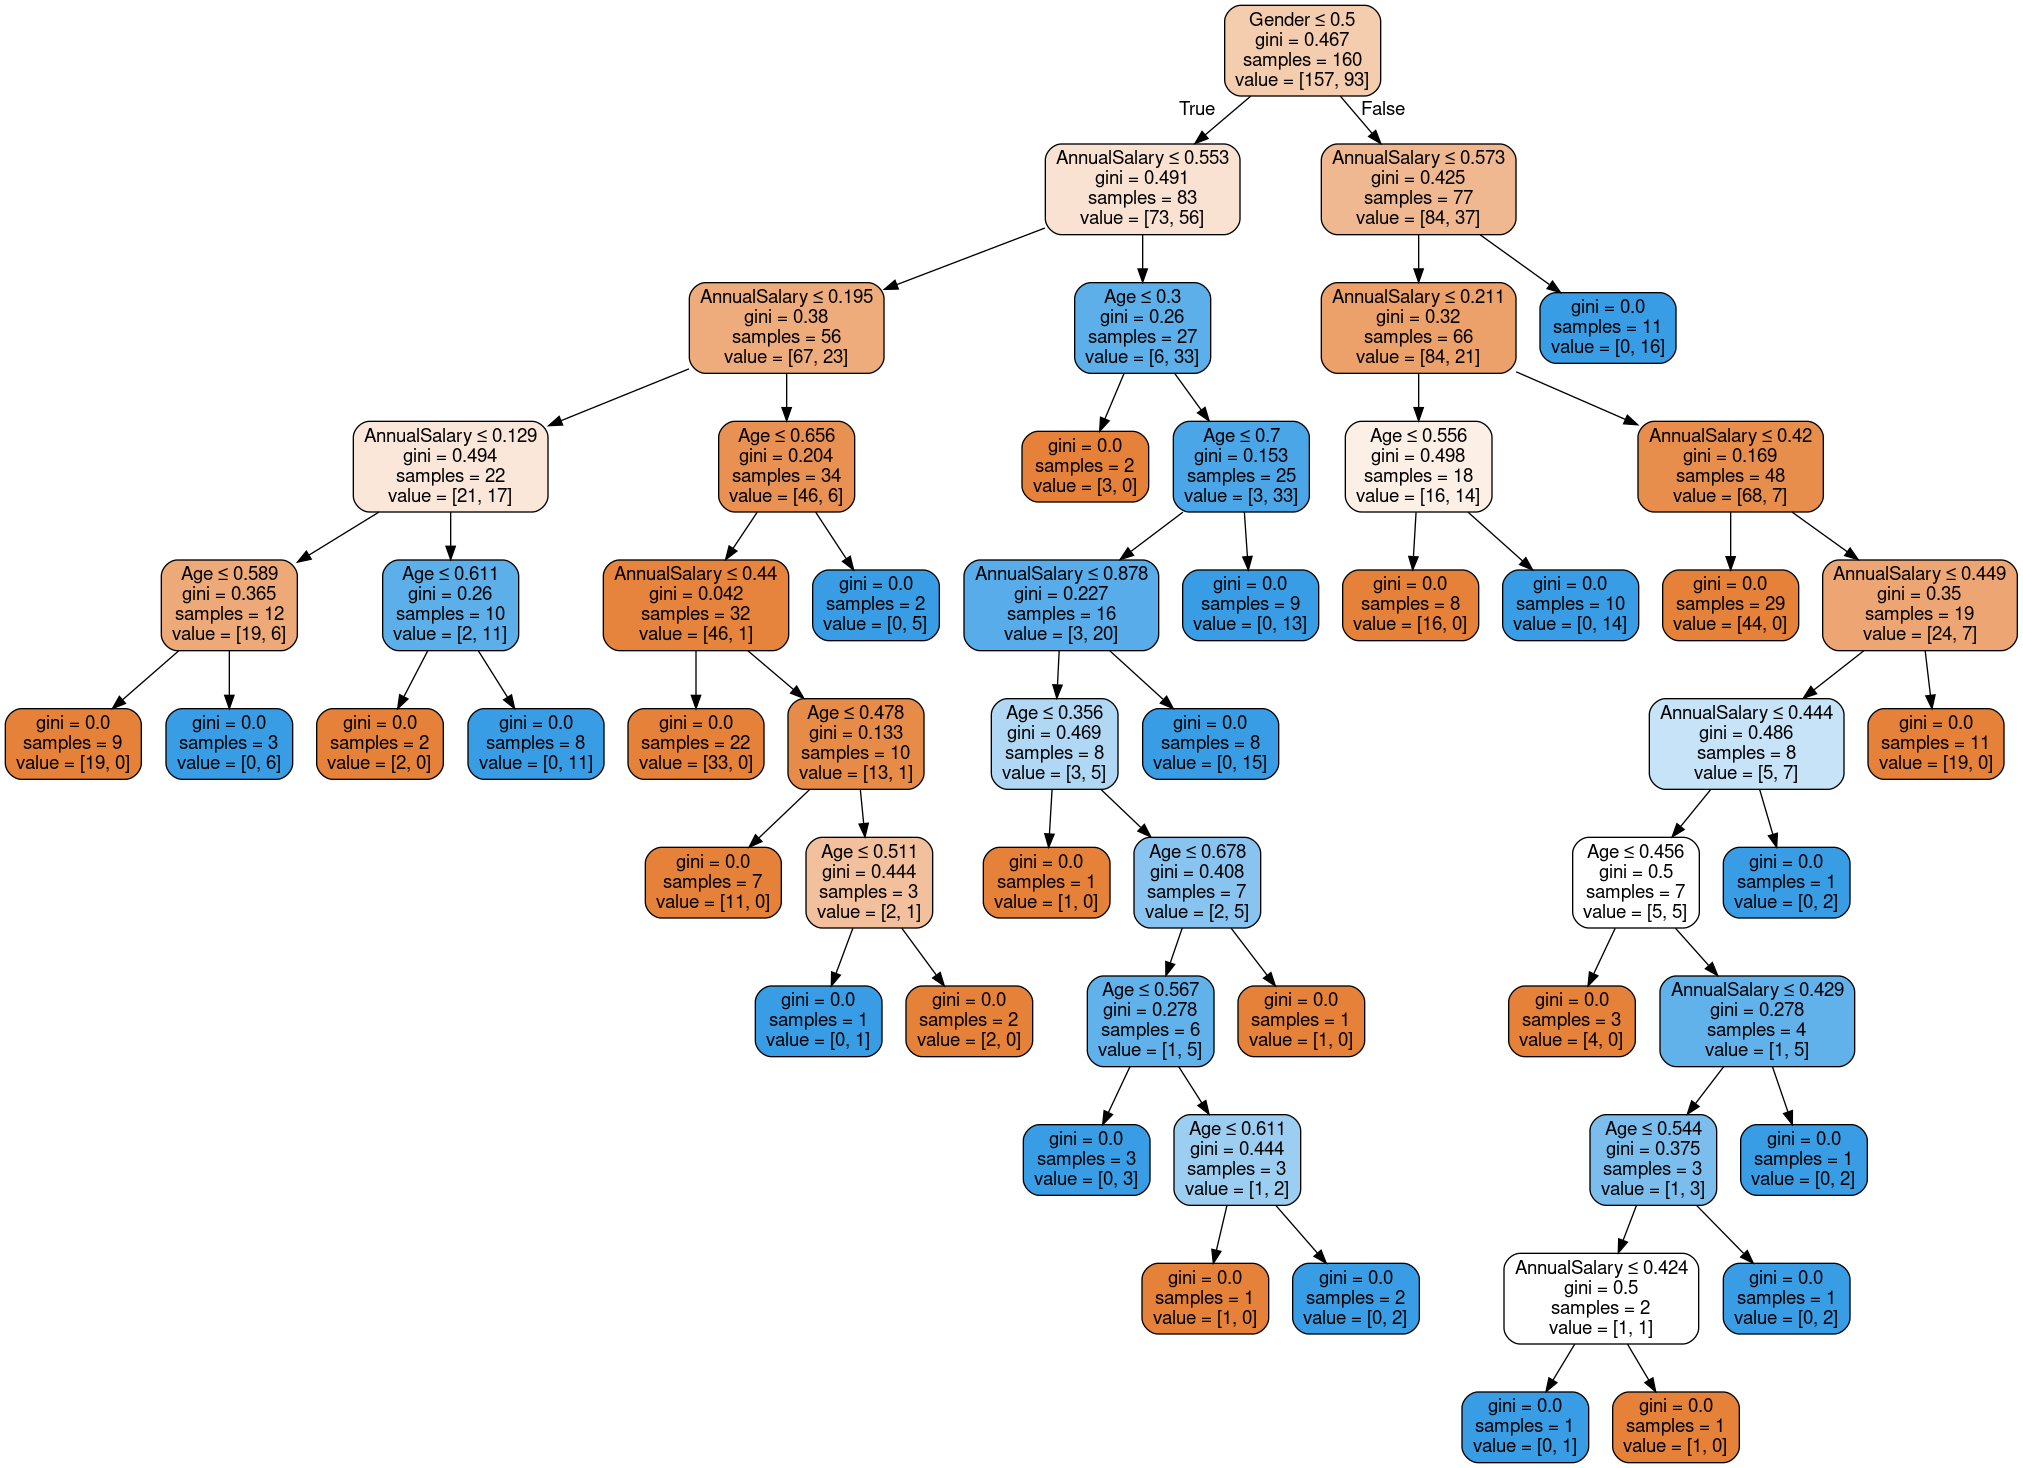

In [138]:
Image(get_png_tree(tree.estimators_[1], FEATURE_NAMES), width="5000")

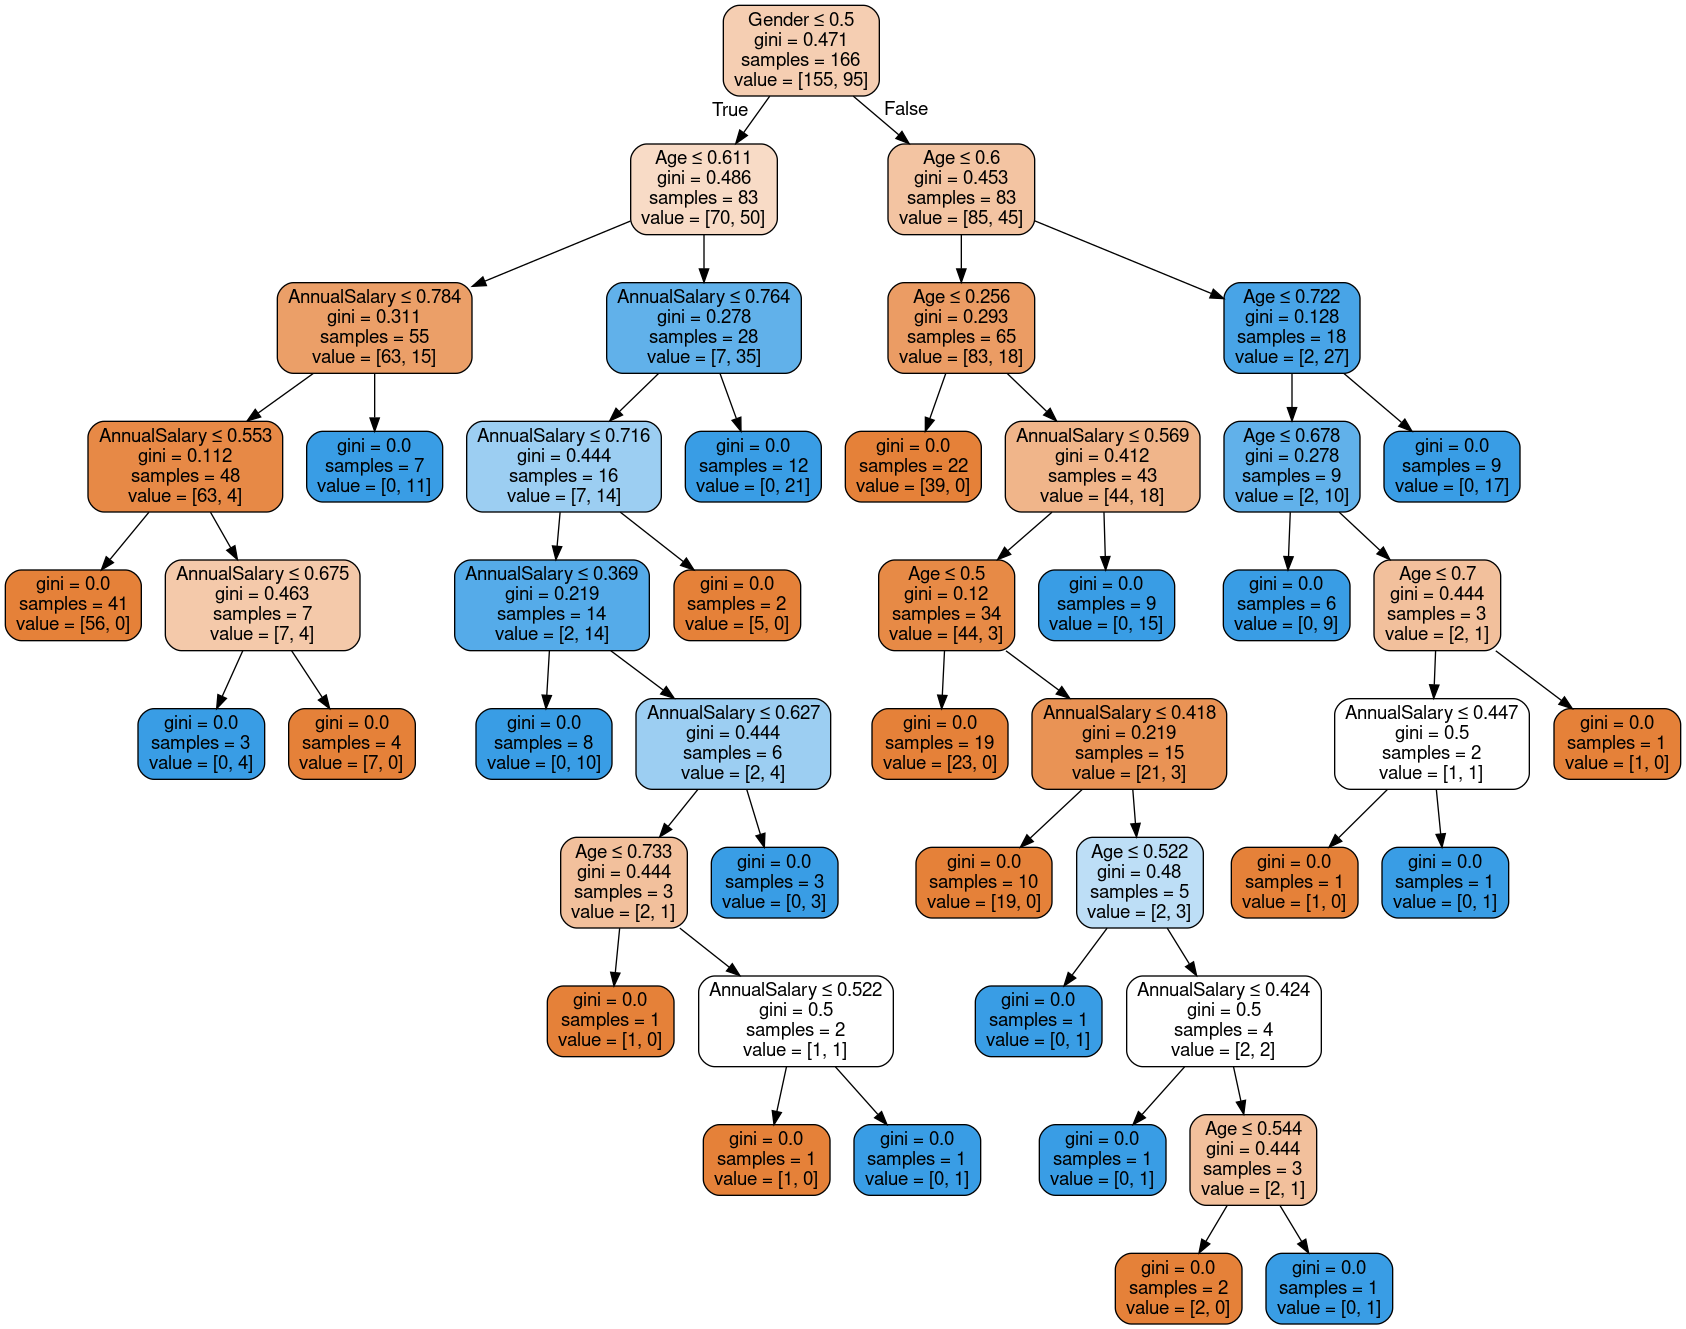

In [139]:
Image(get_png_tree(tree.estimators_[2], FEATURE_NAMES), width="5000")

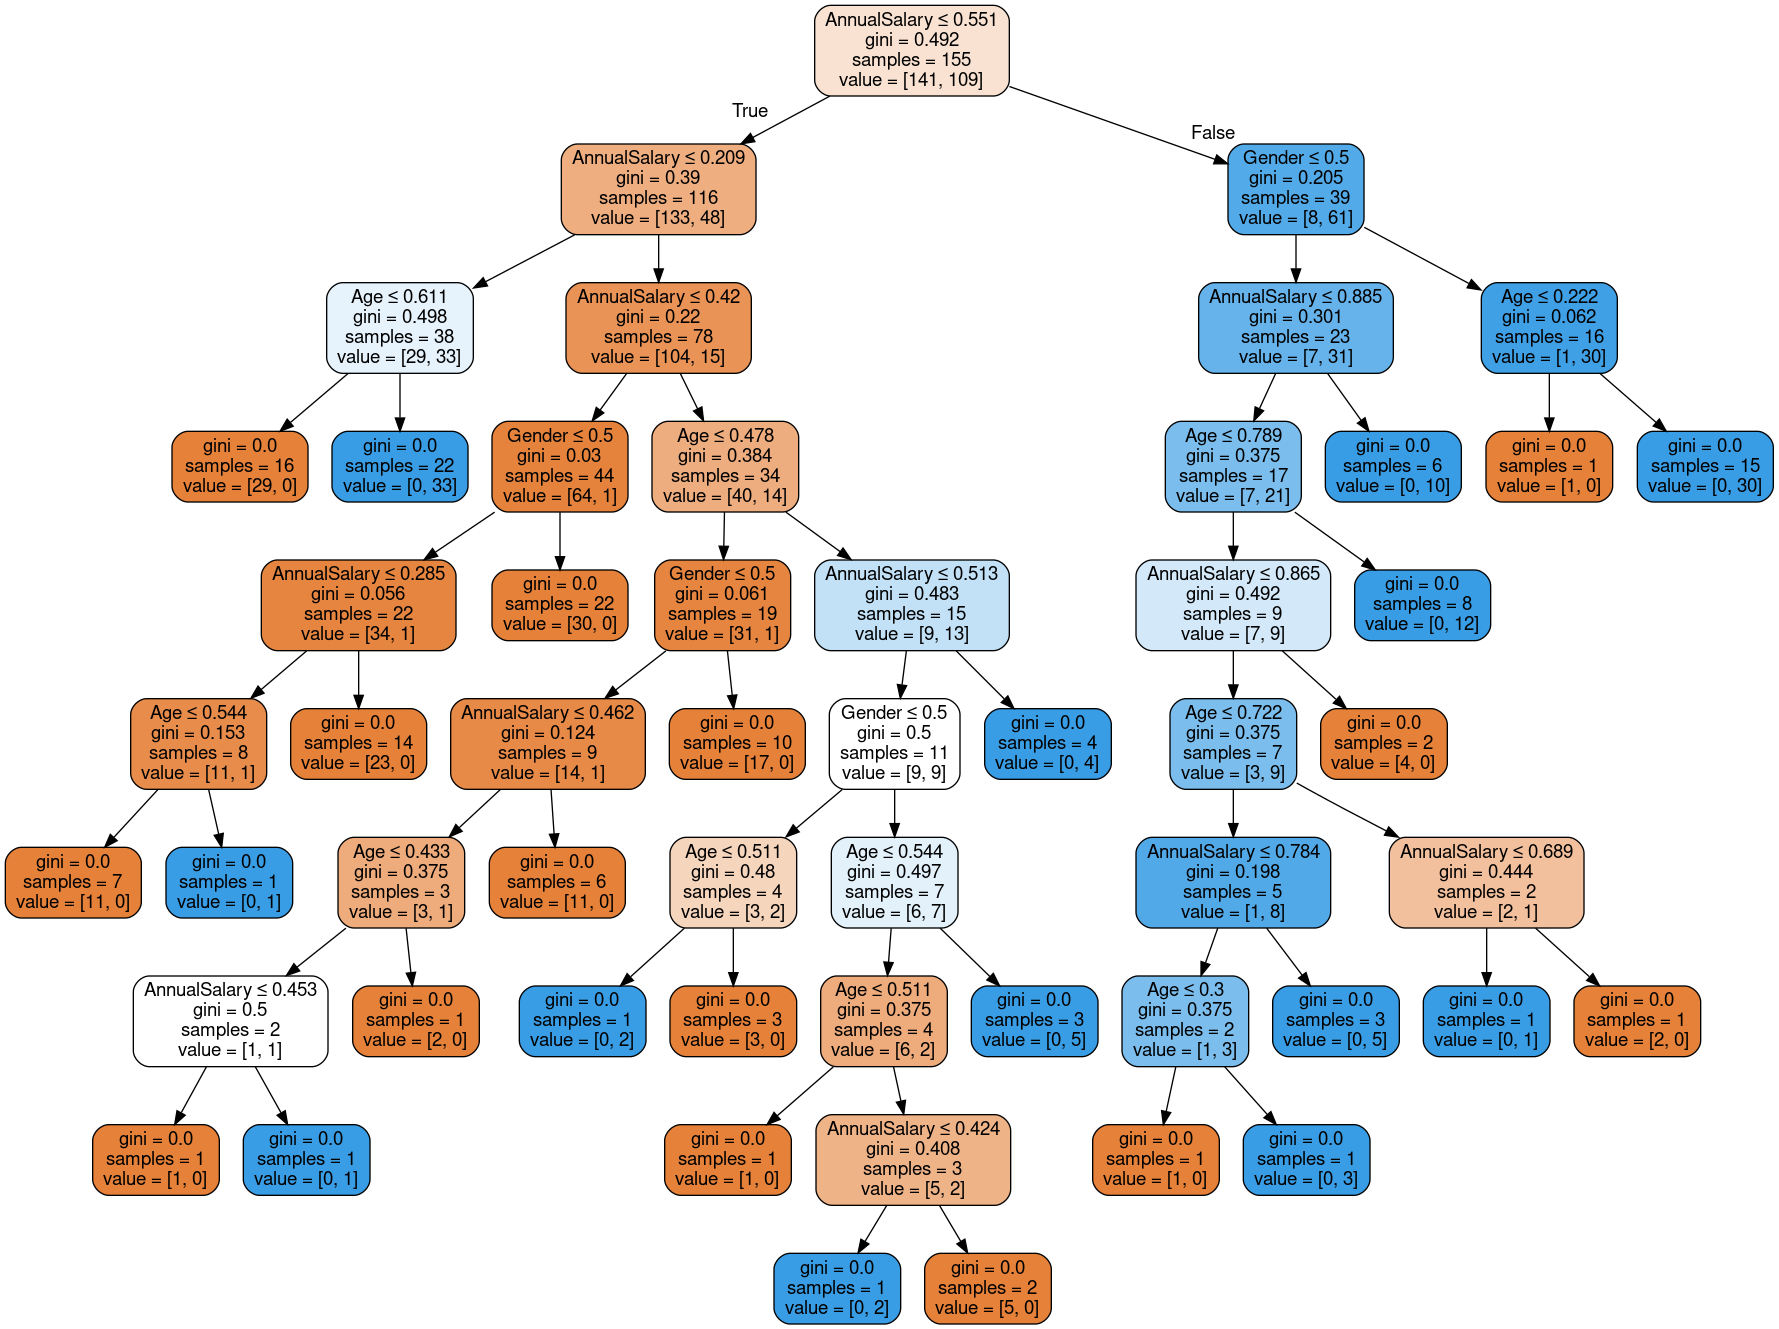

In [140]:
Image(get_png_tree(tree.estimators_[3], FEATURE_NAMES), width="5000")

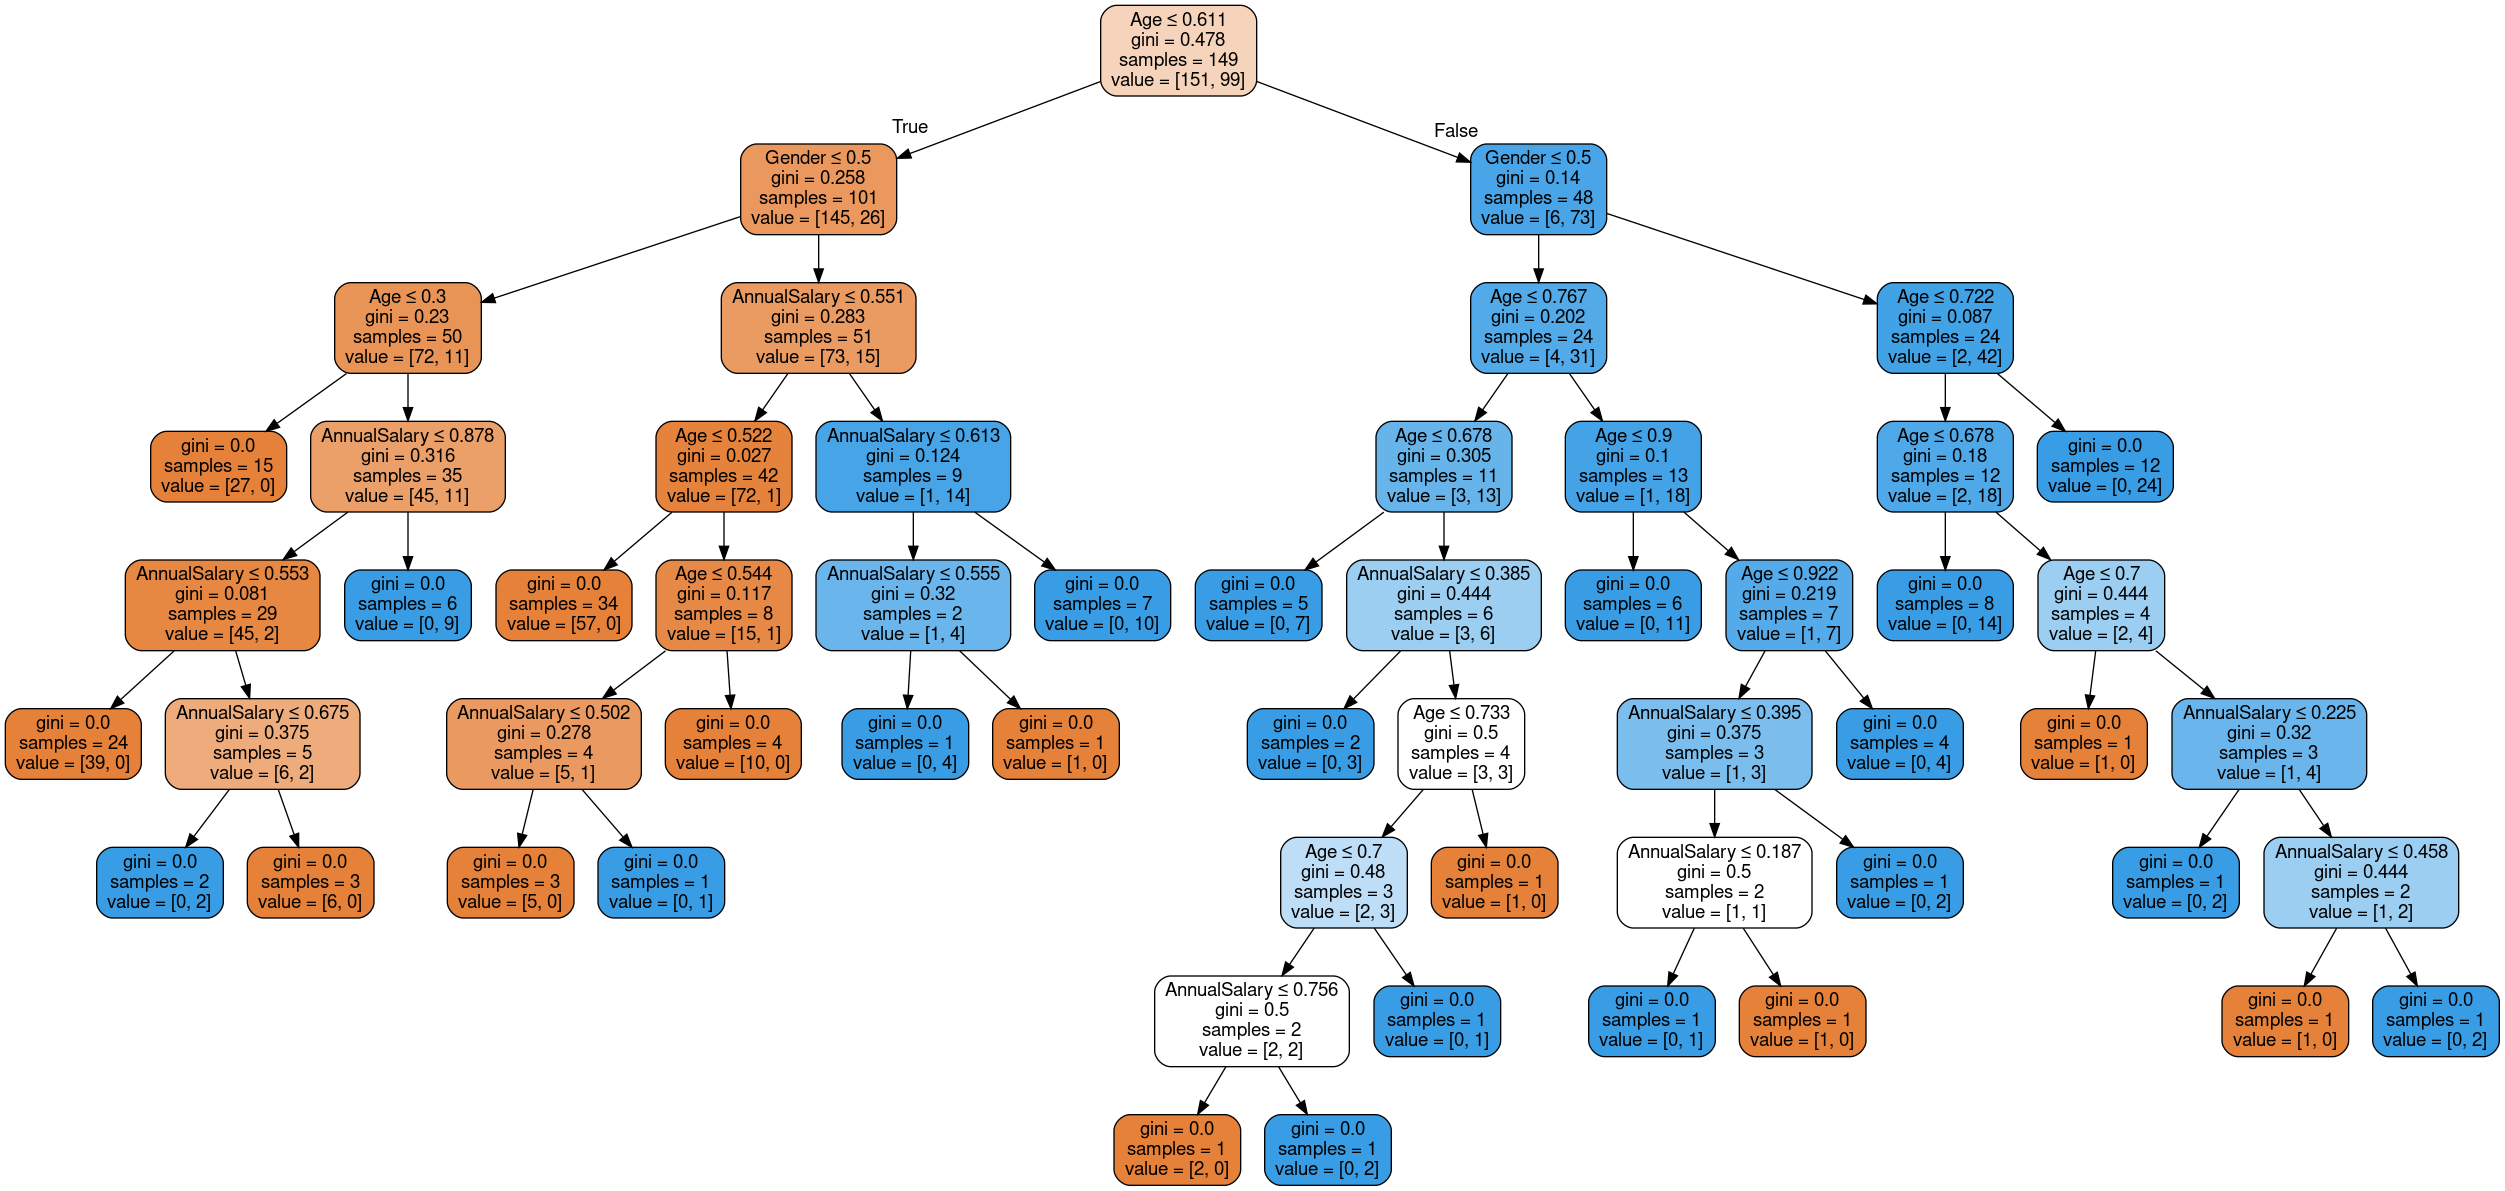

In [141]:
Image(get_png_tree(tree.estimators_[4], FEATURE_NAMES), width="5000")

# 2 метод:бустинг

In [142]:
# Обучим классификатор на 5 деревьях
ab = AdaBoostClassifier(n_estimators=5, algorithm='SAMME', random_state=10)
ab.fit(X_train, y_train)
ab_pred = ab.predict(X_test)

/home/pahan/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


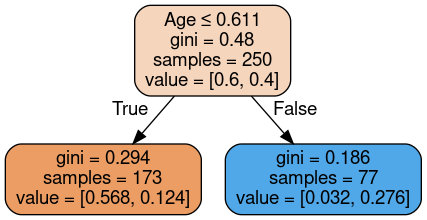

In [143]:
Image(get_png_tree(ab.estimators_[0], FEATURE_NAMES), width='40%')

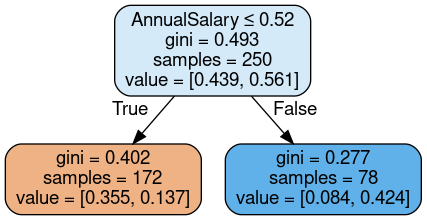

In [144]:
Image(get_png_tree(ab.estimators_[1], FEATURE_NAMES), width='40%')

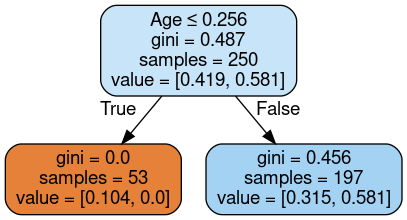

In [145]:
Image(get_png_tree(ab.estimators_[2], FEATURE_NAMES), width='40%')

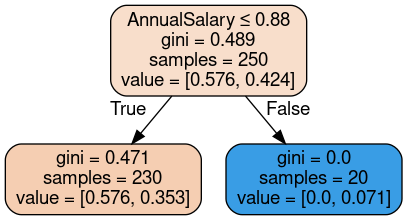

In [146]:
Image(get_png_tree(ab.estimators_[3], FEATURE_NAMES), width='40%')

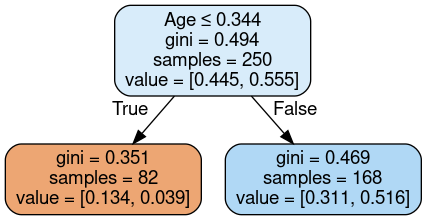

In [147]:
Image(get_png_tree(ab.estimators_[4], FEATURE_NAMES), width='40%')

# 3 метод:стекинг

In [148]:
level1 = [('lr', LogisticRegression()), ('tree', DecisionTreeClassifier()), ('rf', RandomForestClassifier(n_estimators=50)), ('knn', KNeighborsClassifier())]
level2 = RandomForestClassifier(n_estimators=50)
stack = StackingClassifier(estimators=level1, final_estimator=level2)
stack.fit(X_train, y_train)
stack_pred = stack.predict(X_test)

/home/pahan/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/pahan/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


# 4 метод: многослойный персептрон

In [149]:
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
mlp_pred = mlp.predict(X_test)

/home/pahan/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/pahan/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# 5 метод: МГУА

In [150]:
gmdh = GMDHRegressor(ref_functions=('linear', 'linear_cov', 'quadratic', 'cubic'))
gmdh.fit(X_train.to_numpy(), y_train.to_numpy().flatten())
gmdh_pred = gmdh.predict(X_test.to_numpy())
# gmdh_pred = [np.max(UNIQUE_LABELS) if pred > np.max(UNIQUE_LABELS) else np.min(UNIQUE_LABELS) if pred < np.min(UNIQUE_LABELS) else pred for pred in gmdh_pred]
gmdh_pred = [int(round(pred)) for pred in gmdh_pred]

train layer0 in 0.02 sec
train layer1 in 0.03 sec
train layer2 in 0.02 sec
train layer3 in 0.02 sec
train layer4 in 0.02 sec
train layer5 in 0.02 sec
train layer6 in 0.02 sec
train layer7 in 0.02 sec
train layer8 in 0.02 sec
train layer9 in 0.02 sec
train layer10 in 0.02 sec
train layer11 in 0.02 sec
train layer12 in 0.02 sec
train layer13 in 0.02 sec
train layer14 in 0.02 sec
train layer15 in 0.02 sec
train layer16 in 0.02 sec
train layer17 in 0.02 sec
train layer18 in 0.02 sec


Выведем точности

In [151]:
def class_accuracy_score(y_true: pd.DataFrame, y_pred: np.ndarray):
    unique, counts = np.unique(y_true[TARGET_KEY], return_counts=True)
    y_true_values = y_true[TARGET_KEY].values
    result = {}
    for value in unique:
        result[value] = 0
    for index in range(len(y_true_values)):
        if y_true_values[index] == y_pred[index]:
            result[y_true_values[index]] += 1
    for index in range(len(unique)):
        result[unique[index]] /= counts[index]
    result['all'] = accuracy_score(y_true, y_pred)
    return result

In [152]:
tree_accuracy_scores = class_accuracy_score(y_test, tree_pred)
pd.DataFrame.from_dict(tree_accuracy_scores, orient='index', columns=['accuracy'])

,accuracy
0,0.915179
1,0.857616
all,0.892000


In [153]:
ab_accuracy_scores = class_accuracy_score(y_test, ab_pred)
pd.DataFrame.from_dict(ab_accuracy_scores, orient='index', columns=['accuracy'])

,accuracy
0,0.888393
1,0.874172
all,0.882667


In [154]:
stack_accuracy_scores = class_accuracy_score(y_test, stack_pred)
pd.DataFrame.from_dict(stack_accuracy_scores, orient='index', columns=['accuracy'])

,accuracy
0,0.850446
1,0.880795
all,0.862667


In [155]:
mlp_accuracy_scores = class_accuracy_score(y_test, mlp_pred)
pd.DataFrame.from_dict(mlp_accuracy_scores, orient='index', columns=['accuracy'])

,accuracy
0,0.888393
1,0.758278
all,0.836000


In [156]:
gmdh_accuracy_scores = class_accuracy_score(y_test, gmdh_pred)
pd.DataFrame.from_dict(gmdh_accuracy_scores, orient='index', columns=['accuracy'])

,accuracy
0,0.901786
1,0.877483
all,0.892000
